In [3]:
import pandas as pd

# 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df = pd.DataFrame(data)

# 데이터 출력
print(df)

# 특정 열 선택
print(df['Name'])

# 특정 조건에 맞는 데이터 선택
print(df[df['Age'] > 25])

# 데이터 통계 요약
print(df.describe())

# 데이터프레임에 새로운 열 추가
df['Senior'] = df['Age'] > 30
print(df)


      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
2  Charlie   22      Chicago
3    David   32      Houston
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object
    Name  Age         City
1    Bob   27  Los Angeles
3  David   32      Houston
             Age
count   4.000000
mean   26.250000
std     4.349329
min    22.000000
25%    23.500000
50%    25.500000
75%    28.250000
max    32.000000
      Name  Age         City  Senior
0    Alice   24     New York   False
1      Bob   27  Los Angeles   False
2  Charlie   22      Chicago   False
3    David   32      Houston    True


In [5]:
import pandas as pd
import numpy as np

# 랜덤 데이터 생성
np.random.seed(42)
n_samples = 1000

data = {
    'PassengerId': np.arange(1, n_samples + 1),
    'Survived': np.random.randint(0, 2, size=n_samples),
    'Pclass': np.random.randint(1, 4, size=n_samples),
    'Name': ['Name' + str(i) for i in range(n_samples)],
    'Sex': np.random.choice(['male', 'female'], size=n_samples),
    'Age': np.random.uniform(1, 80, size=n_samples),
    'SibSp': np.random.randint(0, 6, size=n_samples),
    'Parch': np.random.randint(0, 6, size=n_samples),
    'Ticket': ['Ticket' + str(i) for i in range(n_samples)],
    'Fare': np.random.uniform(10, 300, size=n_samples),
    'Cabin': ['Cabin' + str(i) if np.random.rand() > 0.7 else np.nan for i in range(n_samples)],
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=n_samples)
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터 확인
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass   Name     Sex        Age  SibSp  Parch  \
0            1         0       2  Name0  female  31.219576      2      2   
1            2         1       3  Name1    male  10.466491      4      2   
2            3         0       1  Name2    male  77.959006      4      4   
3            4         0       1  Name3    male   2.582082      0      5   
4            5         0       1  Name4  female  59.237238      3      5   

    Ticket        Fare   Cabin Embarked  
0  Ticket0   75.562931  Cabin0        S  
1  Ticket1  247.018541     NaN        S  
2  Ticket2  279.815542     NaN        S  
3  Ticket3   37.654667  Cabin3        C  
4  Ticket4  140.517005     NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass      

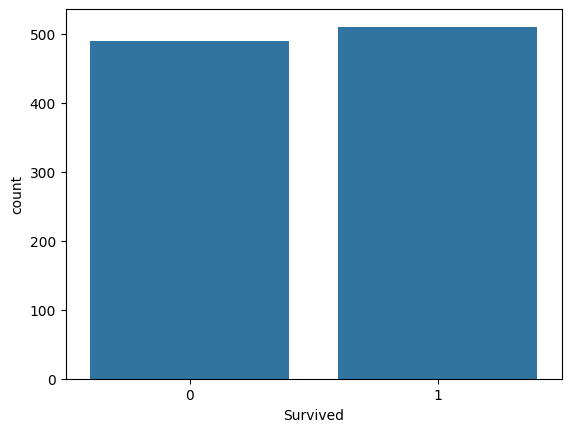

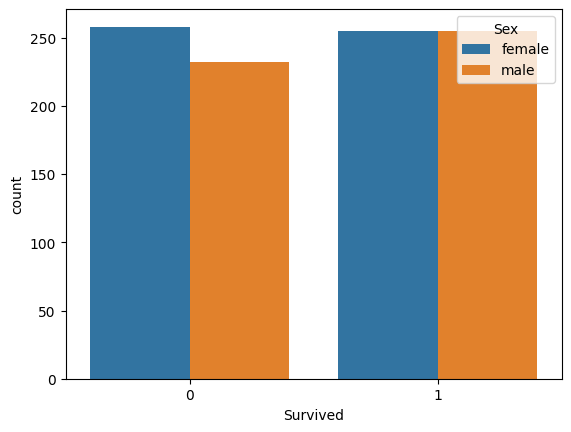

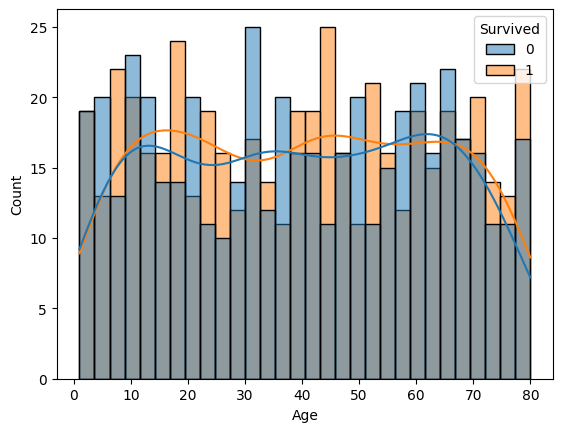

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 생존자 분포 확인
sns.countplot(x='Survived', data=df)
plt.show()

# 성별에 따른 생존자 분포
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

# 연령대에 따른 생존자 분포
sns.histplot(df, x='Age', hue='Survived', bins=30, kde=True)
plt.show()

In [8]:
# 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# 범주형 데이터 인코딩
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 불필요한 열 제거
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 데이터 확인
print(df.head())
print(df.info())

   Survived  Pclass  Sex        Age  SibSp  Parch        Fare  Embarked_Q  \
0         0       2    1  31.219576      2      2   75.562931       False   
1         1       3    0  10.466491      4      2  247.018541       False   
2         0       1    0  77.959006      4      4  279.815542       False   
3         0       1    0   2.582082      0      5   37.654667       False   
4         0       1    1  59.237238      3      5  140.517005        True   

   Embarked_S  
0        True  
1        True  
2        True  
3       False  
4       False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1000 non-null   int64  
 1   Pclass      1000 non-null   int64  
 2   Sex         1000 non-null   int64  
 3   Age         1000 non-null   float64
 4   SibSp       1000 non-null   int64  
 5   Parch       1000 non-null   int64  
 6   Far

/var/folders/r4/w6gk0qbd6bd_sf7xj6nwdnxc0000gn/T/ipykernel_95614/1597646550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/r4/w6gk0qbd6bd_sf7xj6nwdnxc0000gn/T/ipykernel_95614/1597646550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 특징과 레이블 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52
